#  Treadmill Buyer Profile 
<h3>Project Details: </h3>
The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to new customers. The team decides to investigate
whether there are differences across the product with respect to customer
characteristics.


# 1. Data Exploration and Processing:

In [1]:
# Importing all the necessary modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read the file
df = pd.read_csv("aerofit_treadmill_data.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
# Shape of dataframe
df_shape = df.shape
print(f"Shape of dataframe is: {df_shape}")

Shape of dataframe is: (180, 9)


In [4]:
# Datatype of each column
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [5]:
# Missing value detection
df.isnull().sum()     
# There are no missing values in this dataframe

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [6]:
# Checking duplicate values in the dataset
df.duplicated().sum()
# Indicating there are no duplicated values. As the output is having zero rows.

np.int64(0)

As we can see there are no null values and no duplicated values in this dataframe. 
There are only two datatypes in this csv. 1. Object type 2. Integer type.
This csv contains 180 rows and 9 columns. 

# 2. Statistical Summary:

In [7]:
# An analysis of the statistical summary in few lines for both categorical and numerical features.
# NUMERICAL FEATURES
df.describe()  

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Describe is used for numerical features. Income and Miles column have higher outlier as compared to any other column.

In [8]:
# CATEGORICAL FEATURES
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


This include the object datatype. Having these values.

# 3. Non-Graphical Analysis:

In [9]:
# Value Counts for all categorical features
product_summary = df['Product'].value_counts()
gender_summary = df['Gender'].value_counts()
ms_summary = df['MaritalStatus'].value_counts()
print(f"Product column:\n{product_summary}\n")
print(f"Gender column:\n{gender_summary}\n")
print(f"Marital Status column:\n{ms_summary}")

Product column:
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Gender column:
Gender
Male      104
Female     76
Name: count, dtype: int64

Marital Status column:
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


In [10]:
# Unique Attributes for all categorical features
product_sumary = df['Product'].unique()
gender_sumary = df['Gender'].unique()
ms_sumary = df['MaritalStatus'].unique()
print(f"Product column:\n{product_sumary}\n")
print(f"Gender column:\n{gender_sumary}\n")
print(f"Marital Status column:\n{ms_sumary}")

Product column:
['KP281' 'KP481' 'KP781']

Gender column:
['Male' 'Female']

Marital Status column:
['Single' 'Partnered']


In [11]:
for columns in df:
    unique = df[columns].unique()
    print(f"Unique value is: {unique} in {columns}")

print(".....................\n")

for columns in df:
    valueCount = df[columns].value_counts()
    print(f"Value Count is: {valueCount} in {columns}")

Unique value is: ['KP281' 'KP481' 'KP781'] in Product
Unique value is: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42] in Age
Unique value is: ['Male' 'Female'] in Gender
Unique value is: [14 15 12 13 16 18 20 21] in Education
Unique value is: ['Single' 'Partnered'] in MaritalStatus
Unique value is: [3 2 4 5 6 7] in Usage
Unique value is: [4 3 2 1 5] in Fitness
Unique value is: [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508] in Income
Unique value is: [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 1

Non graphical analysis having the unique and value counts of columns. As we can see there is no data inconsitency in this dataframe. There is no NaN values neither anything else.

# 4. Graphical Analysis:

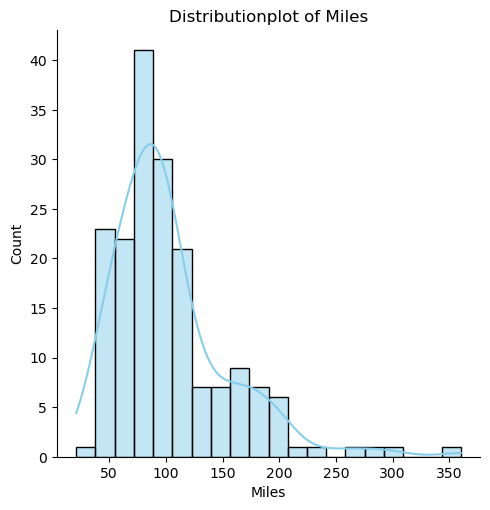

In [12]:
# Univariate Analysis - Numerical features:
# Distribution Plot
sns.displot(x=df['Miles'], color='skyblue',kde=True)
plt.title('Distributionplot of Miles')
plt.show()

This is right skewed histogram indicating outliers.

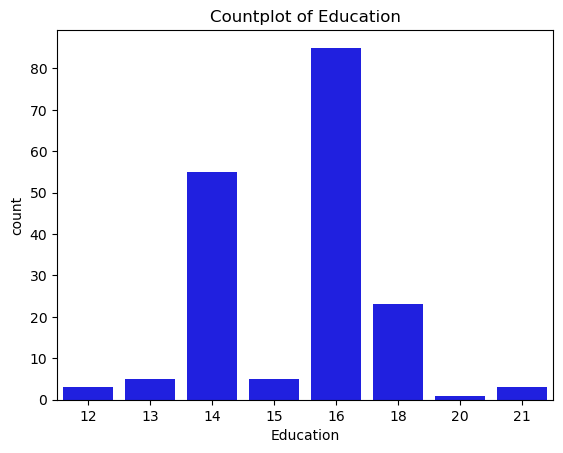

In [13]:
# Univariate Analysis - Numerical features:
# Count Plot
sns.countplot(x=df['Education'], color='blue')
plt.title('Countplot of Education')
plt.show()

Countplot of Education column. This might also have outliers.

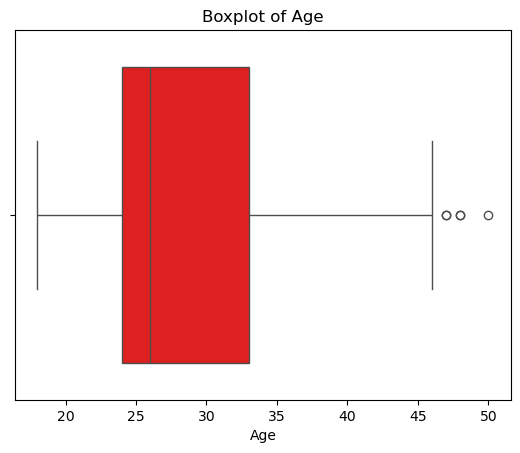

In [14]:
# Univariate Analysis - Numerical features:
# Box Plot
sns.boxplot(x=df['Age'], color='red')
plt.title('Boxplot of Age')
plt.show()

Outliers are less in Age column as we can see the boxplot of this.

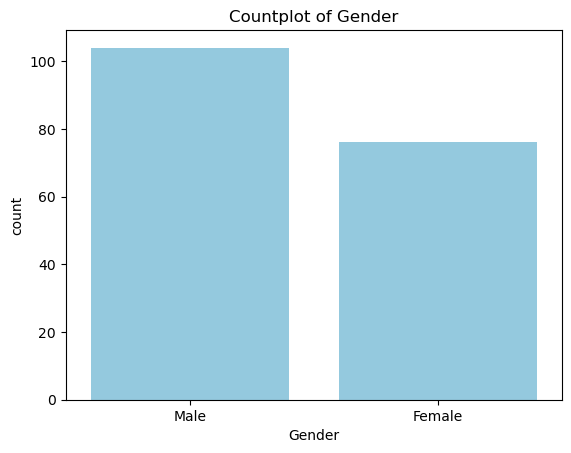

In [15]:
# Univariate Analysis - Categorical features:
# Count Plot
sns.countplot(x=df['Gender'], color='skyblue')
plt.title('Countplot of Gender')
plt.show()

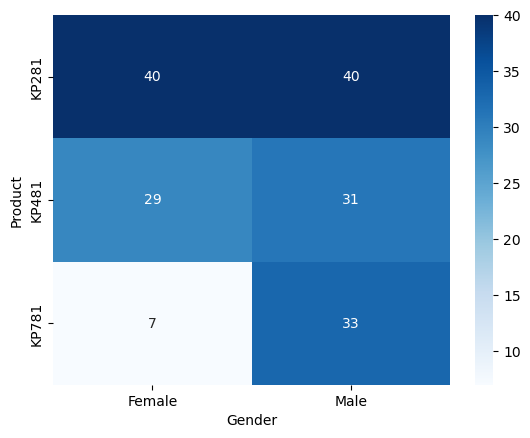

In [16]:
# Bivariate Analysis:
# Check features effect on the product purchased 
# Product vs Gender
sns.heatmap(pd.crosstab(df['Product'], df['Gender']), annot=True, cmap="Blues")
plt.show()

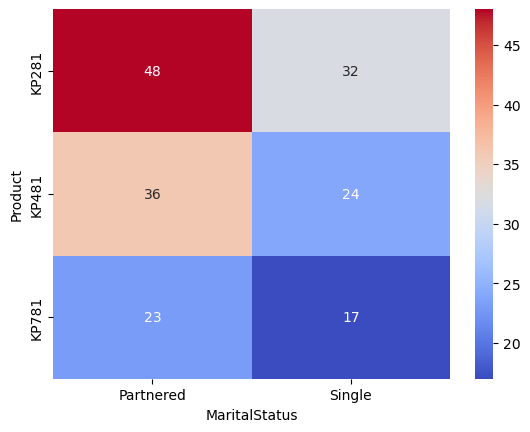

In [17]:
# Bivariate Analysis:
# Check features effect on the product purchased
# Product vs MaritalStatus
sns.heatmap(pd.crosstab(df['Product'], df['MaritalStatus']), annot=True, cmap="coolwarm")
plt.show()

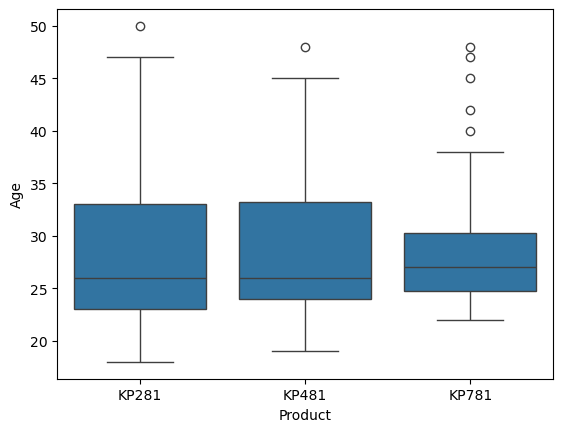

In [18]:
# Bivariate Analysis:
# Check features effect on the product purchased
# Product vs Age
sns.boxplot(x='Product', y='Age', data=df)
plt.show()

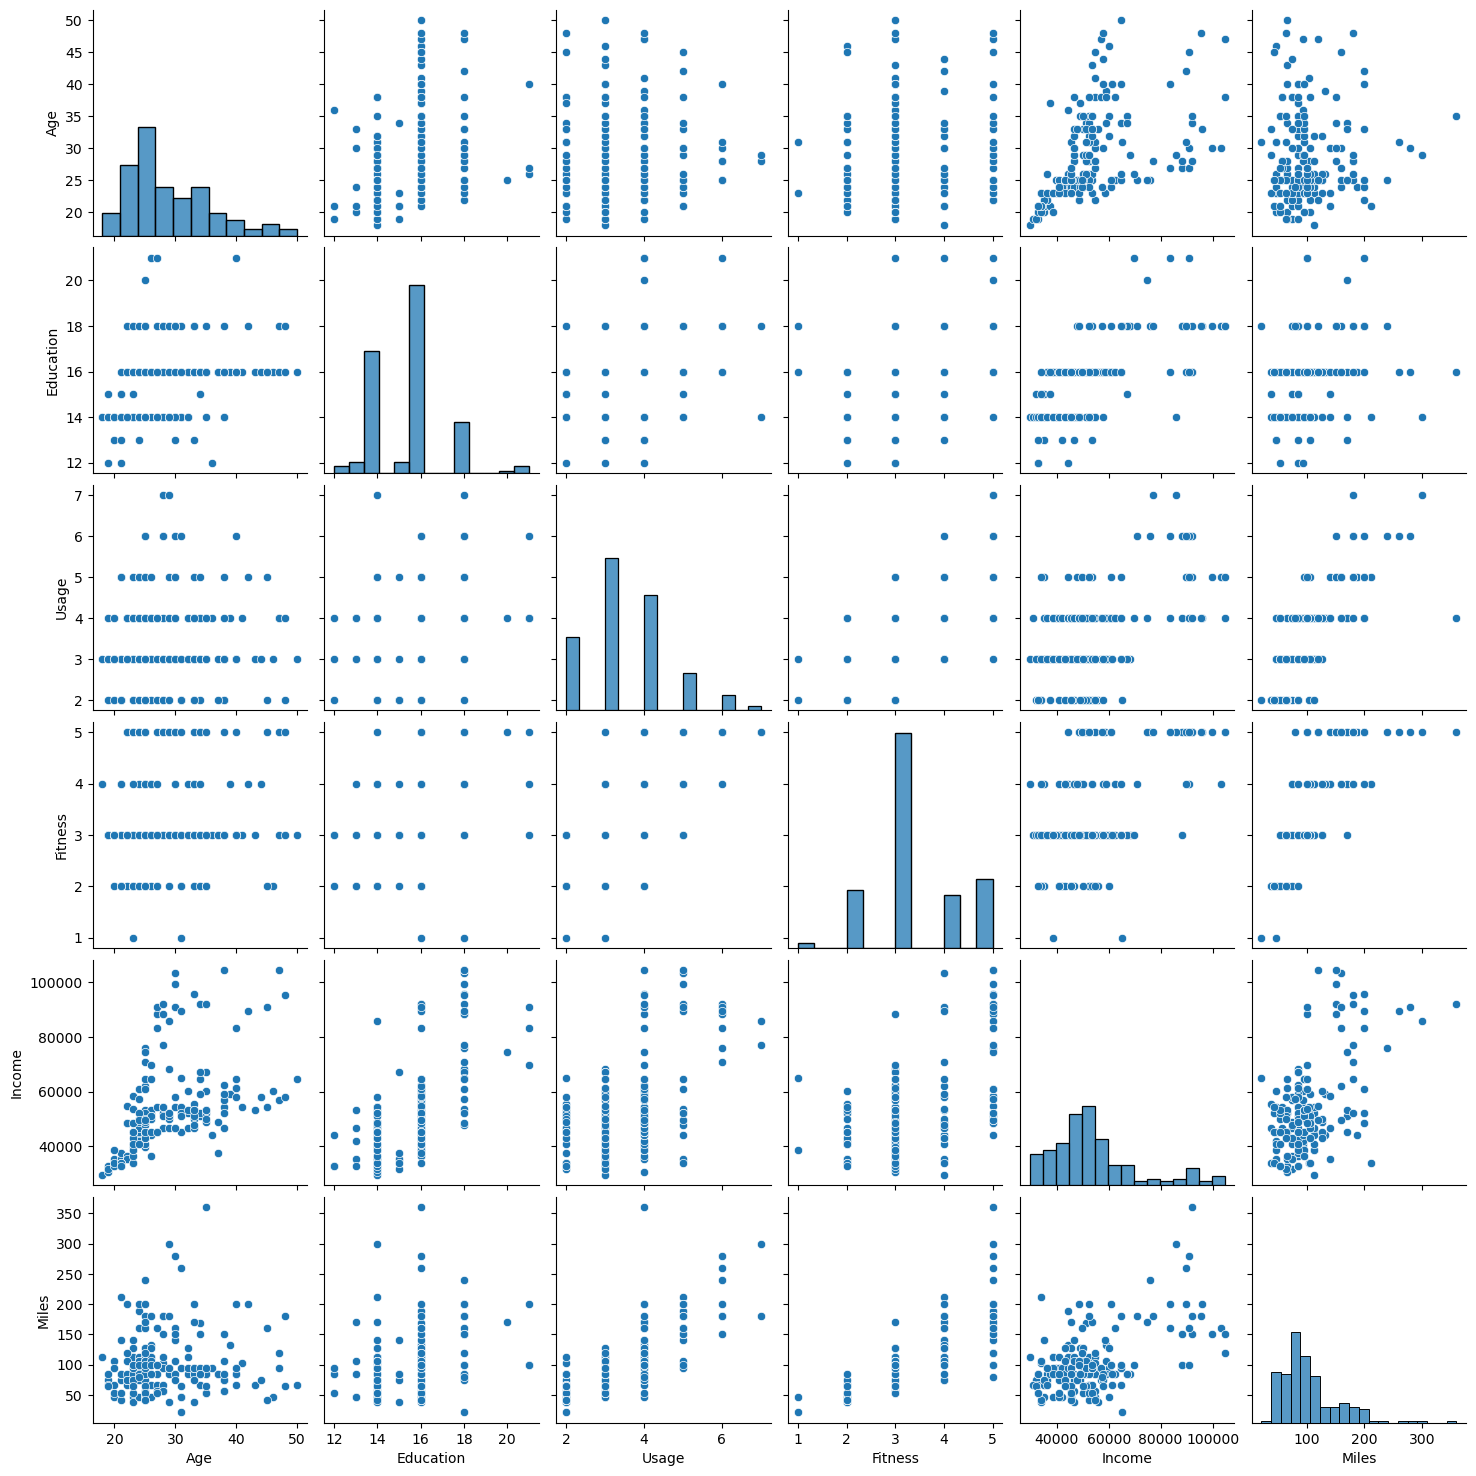

In [19]:
# Multivariate Analysis:
# Create pairplots to show relationship of features
sns.pairplot(df)

A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset. It combines both histogram and scatter plots, providing a unique overview of the dataset's distributions and correlations.

# 5. Correlation Analysis:

In [20]:
# NUMERICAL
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()  
print(correlation_matrix)

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000


<Axes: >

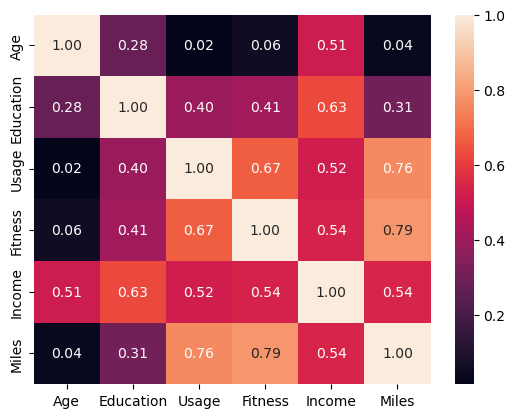

In [21]:
sns.heatmap(correlation_matrix, annot=True, cbar=True, fmt=".2f")

In [ ]:
# CATEGORICAL  -- ENCODING
categorical_columns = ['Product', 'Gender', 'MaritalStatus']  # Adjust as needed
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap (with Encoded Categorical Data)")
plt.show()

# 6. Outlier Detection:

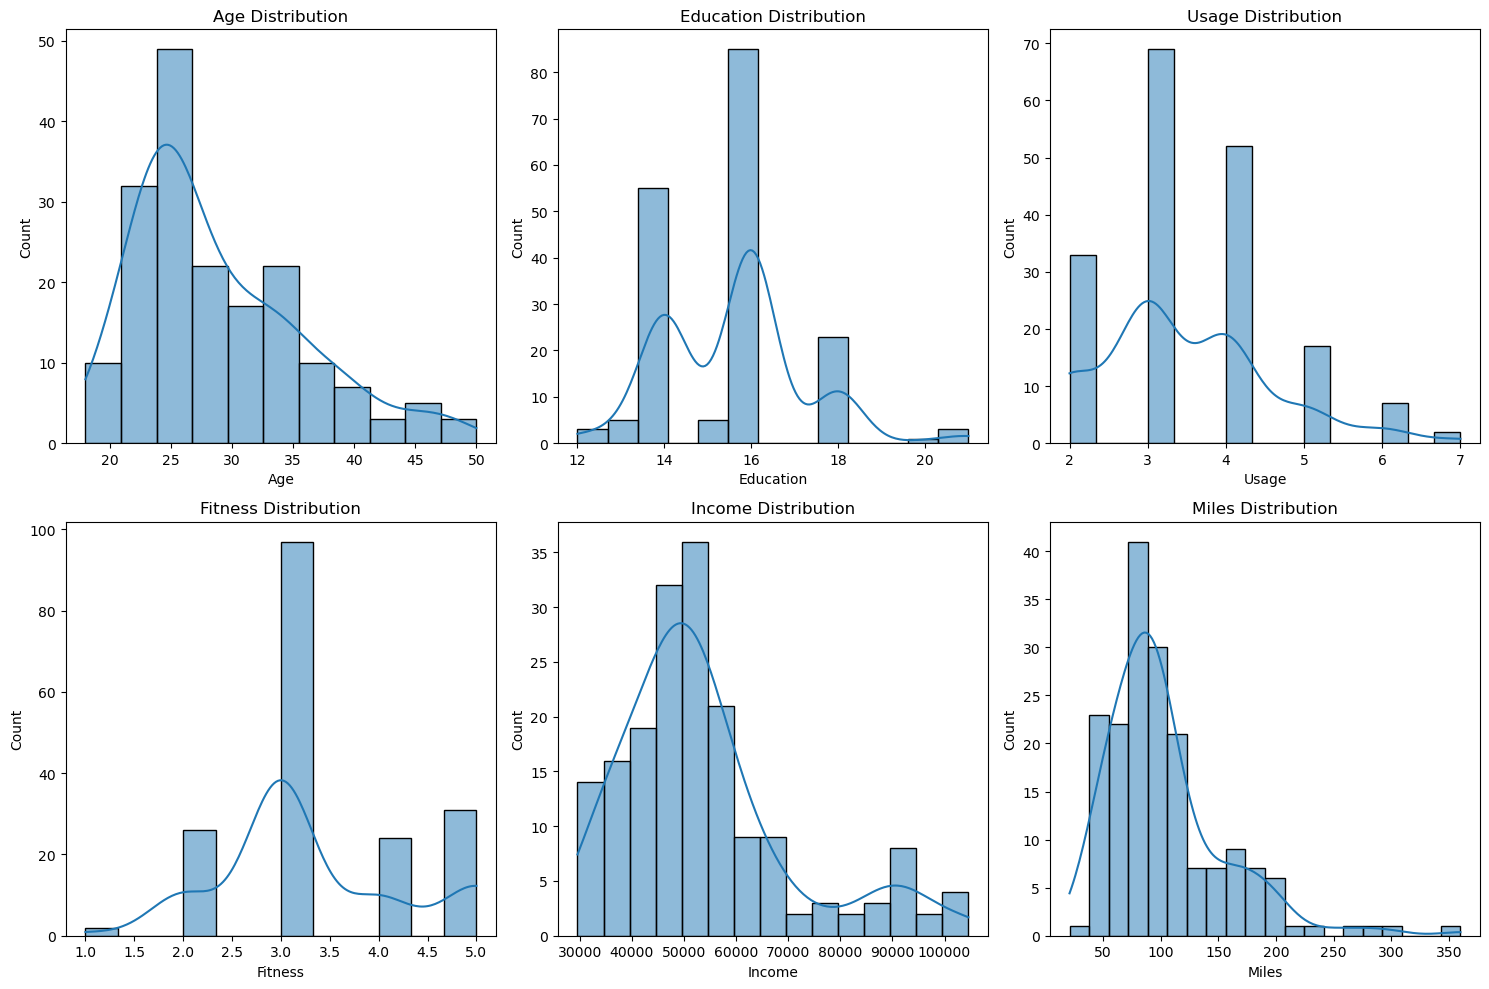

In [22]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure with appropriate size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and plot
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)  # Create grid layout dynamically
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Age Skewness: 0.9821608255301499
Income Skewness: 1.2917845606896028
Miles Skewness: 1.7244965928707188
Education Skewness: 0.6222941428985225
Usage Skewness: 0.7394944961814618
Fitness Skewness: 0.45479999572809515


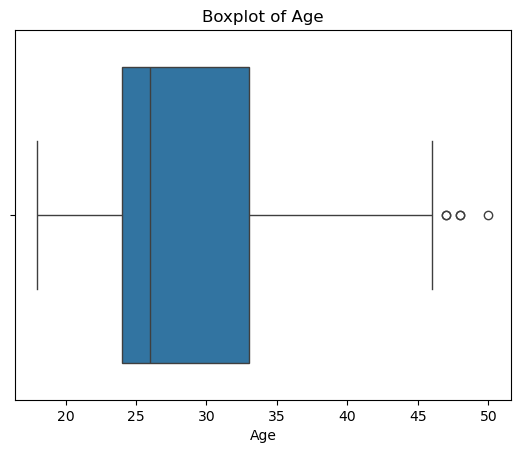

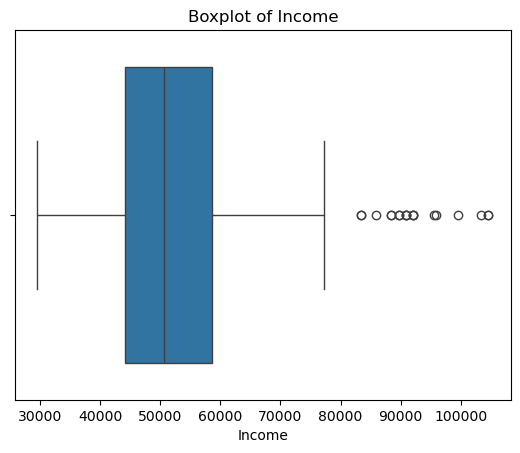

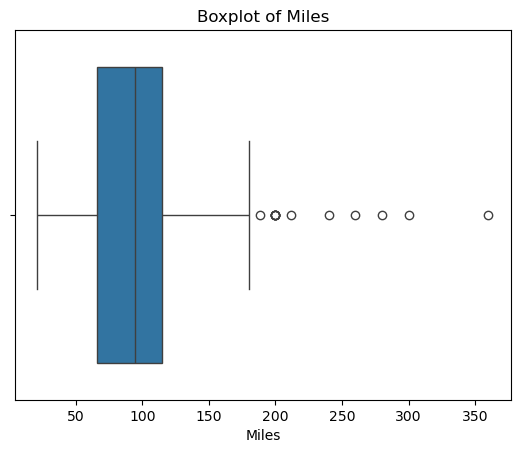

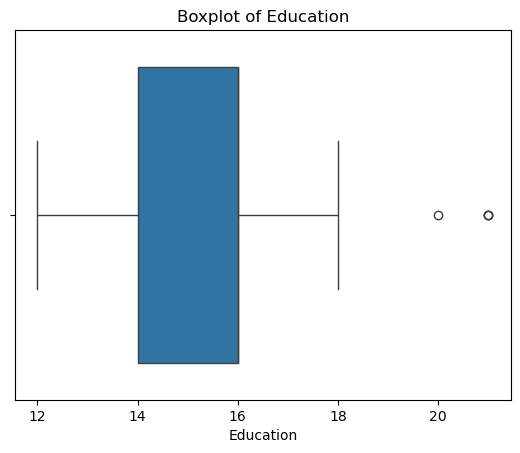

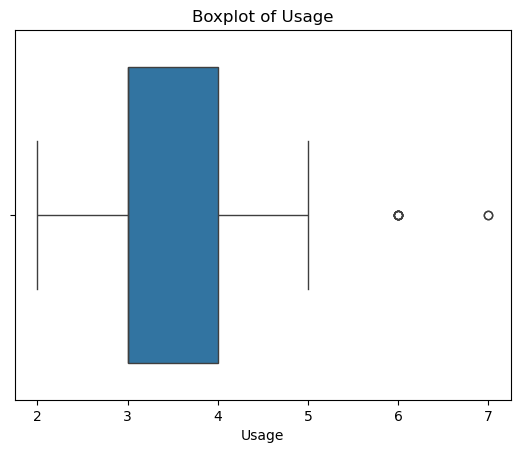

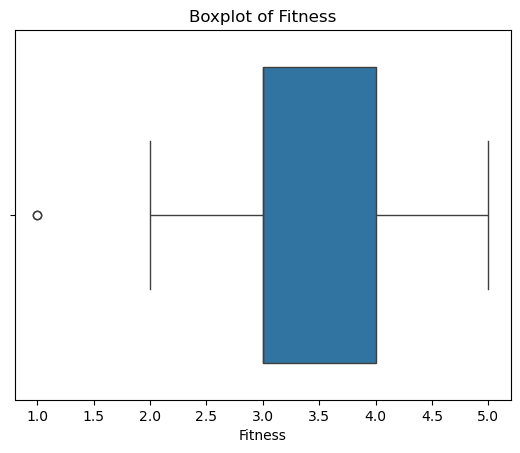

In [23]:
# Skewness
for col in ['Age', 'Income', 'Miles','Education','Usage','Fitness']:
    print(f"{col} Skewness: {df[col].skew()}")

# Outliers using Boxplot
for col in ['Age', 'Income', 'Miles','Education','Usage','Fitness']:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [24]:
def calculate_iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Column: {column}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}\n")
    
    # Filter outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in '{column}':\n{outliers}\n")

    return outliers

In [25]:
# Check outliers for all numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    calculate_iqr_outliers(df, col)

Column: Age
Q1: 24.0, Q3: 33.0, IQR: 9.0
Lower Bound: 10.5, Upper Bound: 46.5

Outliers in 'Age':
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
78    KP281   47    Male         16     Partnered      4        3   56850   
79    KP281   50  Female         16     Partnered      3        3   64809   
139   KP481   48    Male         16     Partnered      2        3   57987   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
78      94  
79      66  
139     64  
178    120  
179    180  

Column: Education
Q1: 14.0, Q3: 16.0, IQR: 2.0
Lower Bound: 11.0, Upper Bound: 19.0

Outliers in 'Education':
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
156   KP781   25    Male         20     Partnered      4        5   74701   
157   KP781   26  Female         21        Single      4        3   69721   
161   KP781   27   

Outliers Detected

Education:
One outlier with Education = 21.
This value lies outside the bounds (11,19)

Fitness:
Multiple outliers were detected. These correspond to values not equal to 3, because the IQR for Fitness is 0 (indicating the majority have Fitness = 3).
Values like 1, 2, 4, and 5 are treated as outliers.

Miles:
Two outliers detected with values 160, which are above the upper bound 151

Age, Usage, and Income:
No outliers detected in these columns.

In [26]:
df['Miles'] = df['Miles'].clip(15, 151)
df['Education'] = df['Education'].clip(11, 19)

In [27]:
print(df[['Miles', 'Education']].describe())

            Miles   Education
count  180.000000  180.000000
mean    95.577778   15.533333
std     34.355674    1.507523
min     21.000000   12.000000
25%     66.000000   14.000000
50%     94.000000   16.000000
75%    114.750000   16.000000
max    151.000000   19.000000


Outliers are treated using Capping method. It is a method to handle outliers by limiting extreme values to specified thresholds.

# 7. Conditional Probabilities:

In [28]:
# What percent of customers have purchased KP281, KP481, or KP781?
product_counts = df['Product'].value_counts()
product_percentages = (product_counts / len(df)) * 100
print(product_percentages)

Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: count, dtype: float64


KP281 is the most purchased treadmill than others.

In [29]:
# Create frequency tables and calculate the percentage as follows
# Product – Gender
#      Percentage of a Male customer purchasing a treadmill
#      Percentage of a Female customer purchasing KP781 treadmill
#      Probability of a customer being a Female given that Product is KP281

gender_product_table = pd.crosstab(df['Gender'], df['Product'])

male_percentage = (gender_product_table.loc['Male'].sum() / df.shape[0]) * 100

female_kp781_percentage = (gender_product_table.loc['Female', 'KP781'] / df.shape[0]) * 100

female_given_kp281 = (gender_product_table.loc['Female', 'KP281'] / gender_product_table['KP281'].sum()) * 100

print(f"Frequency table:\n{gender_product_table}")
print(f"\nMale percentage purchasing treadmill: {male_percentage}")
print(f"Female percentage purchasing KP781 treadmill: {female_kp781_percentage}")
print(f"Probability of a customer being a Female purchasing KP281: {female_given_kp281}")

Frequency table:
Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33

Male percentage purchasing treadmill: 57.77777777777777
Female percentage purchasing KP781 treadmill: 3.888888888888889
Probability of a customer being a Female purchasing KP281: 50.0


In [30]:
# Filter customers with Age between 20 and 30
age_20_30 = df[(df['Age'] >= 20) & (df['Age'] <= 30)]
age_20_30_percentage = (len(age_20_30) / len(df)) * 100

print(age_20_30)
print(f"Percentage of customers aged 20-30 purchasing treadmill: {age_20_30_percentage}")

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
4     KP281   20    Male         13     Partnered      4        2   35247   
5     KP281   20  Female         14     Partnered      3        3   32973   
6     KP281   21  Female         14     Partnered      3        3   35247   
7     KP281   21    Male         13        Single      3        3   32973   
8     KP281   21    Male         15        Single      5        4   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
165   KP781   29    Male         18        Single      5        5   52290   
166   KP781   29    Male         14     Partnered      7        5   85906   
167   KP781   30  Female         16     Partnered      6        5   90886   
168   KP781   30    Male         18     Partnered      5        4  103336   
169   KP781   30    Male         18     Partnered      5        5   99601   

     Miles  
4       47  
5       66  
6       75  
7       85  
8      141

In [31]:

income_max = df['Income'].max()  
bins = [0, 50000, income_max + 1] 
df['Income_Level'] = pd.cut(df['Income'], bins=bins, labels=['Low', 'High'])

income_product_table = pd.crosstab(df['Income_Level'], df['Product'])
low_income_percentage = (income_product_table.loc['Low'].sum() / df.shape[0]) * 100
high_income_kp781_percentage = (income_product_table.loc['High', 'KP781'] / df.shape[0]) * 100
high_income_given_kp781 = (income_product_table.loc['High', 'KP781'] / income_product_table['KP781'].sum()) * 100

print(f"Frequency table for Product vs Income_Level:\n{income_product_table}")
print(f"\nPercentage of low-income customers purchasing any treadmill: {low_income_percentage:.2f}%")
print(f"Percentage of high-income customers purchasing KP781: {high_income_kp781_percentage:.2f}%")
print(f"Percentage of high-income customers given KP781: {high_income_given_kp781:.2f}%")

Frequency table for Product vs Income_Level:
Product       KP281  KP481  KP781
Income_Level                     
Low              48     30      5
High             32     30     35

Percentage of low-income customers purchasing any treadmill: 46.11%
Percentage of high-income customers purchasing KP781: 19.44%
Percentage of high-income customers given KP781: 87.50%


In [32]:
fitness_product_table = pd.crosstab(df['Fitness'], df['Product'])
fitness_5_percentage = (fitness_product_table.loc[5].sum() / df.shape[0]) * 100
fitness_5_kp781_percentage = (fitness_product_table.loc[5, 'KP781'] / df.shape[0]) * 100
fitness_5_given_kp781 = (fitness_product_table.loc[5, 'KP781'] / fitness_product_table['KP781'].sum()) * 100

print(f"Frequency table for Product vs Fitness:\n{fitness_product_table}")
print(fitness_5_percentage)
print(fitness_5_kp781_percentage)
print(fitness_5_given_kp781)

Frequency table for Product vs Fitness:
Product  KP281  KP481  KP781
Fitness                     
1            1      1      0
2           14     12      0
3           54     39      4
4            9      8      7
5            2      0     29
17.22222222222222
16.11111111111111
72.5


In [33]:
marital_status_table = df['MaritalStatus'].value_counts()
partnered_percentage = (marital_status_table.loc['Partnered'] / df.shape[0]) * 100

print(f"Frequency table for Marital Status:\n{marital_status_table}")
print(f"\nPercentage of partnered customers: {partnered_percentage}")

Frequency table for Marital Status:
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

Percentage of partnered customers: 59.44444444444444


# 8. Actionable Insights & Recommendations:

# Unique Values for Categorical Columns:

Product: 

        The three unique treadmill models are KP281, KP481, and KP781.
Gender: 

        There are two unique values: Male and Female.
Marital Status: 

        The two possible values are Single and Partnered.

        
# Value Counts:

Product:

KP281:
        
        80
KP481:
        
        60
KP781: 
        
        40

        
Age:


        The dataset spans a wide range of ages, with a peak in the 20s and 30s. The most common age is 25 (25 occurrences).
Gender: 

        There are 104 male customers and 76 female customers.
Education: 

        The most common education level is 16 years, with 85 occurrences.
Marital Status: 

        107 customers are partnered, and 73 are single.
Usage:

        Most customers plan to use the treadmill 3 times per week (69 occurrences), with fewer customers planning 6 or 7 times per week.
Fitness: 

        The majority of customers rate their fitness as level 3 (97 occurrences), followed by level 5 (31 occurrences), with only a small number rating their fitness as 1.
        
Income: 

        There are 62 unique income values, with no dominant income bracket.
        
Miles: 

        The most frequent number of miles walked or run per week is 85 (27 occurrences).
        
# Data Quality:

There is no missing data or inconsistencies in the dataset. Every column has complete information with valid values, as no NaN or duplicated values were found.


# Insights:

Product Distribution: 

        KP281 is the most purchased treadmill model, which could be due to its more affordable price. KP481 has a medium level of sales, and KP781 has the least number of purchases, which could indicate it's targeted at a niche market.
        
Age Distribution: 

        The dataset contains customers across various age groups, with the majority being in their 20s and 30s.
        
Income and Usage: 

        There's a broad range of income levels, but usage frequency data shows that most customers use the treadmill 3-4 times per week, which suggests that fitness levels vary across customers.

        
# Conclusion:

        The dataset appears to be consistent with no missing values. The distribution of values across various columns is reasonable, with no obvious inconsistencies. The data is clean and ready for further analysis, including graphical visualizations and deeper statistical analysis.